In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt 

In [4]:
#Defining location of dataset 
filepath="/opt/datasets/ist652/Crimes/crimes_2018_2021.csv"

In [5]:
crimes=pd.read_csv(filepath)
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
1,11645648,JC212959,1/1/2018 8:00,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,30.0,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
2,11645959,JC211511,12/20/2018 16:00,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,11645557,JC212685,4/1/2018 0:01,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,6.0,44.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
4,11646293,JC213749,12/20/2018 15:00,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN


In [6]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

### Dataset description and data dictionary (the data used in this notebook starts in 2018, not 2001): 

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

##### Explanation of code below 
- Line 1 Converts the "Date" column in the crimes DataFrame to a pandas datetime format.
- Line 2 - Sets the "Date" column as the index of the DataFrame.
- Line 3 Displays the first five rows of the DataFrame

In [7]:
#We have a column with timestamps (the "Date" column). We will convert that column to dates that pandas
#can understand and use it as our index. (It takes a while to complete the conversion.. be patient)
crimes["Date"]=pd.to_datetime(crimes["Date"])
crimes.set_index("Date",inplace=True)
crimes.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
2018-01-01 08:00:00,11645648,JC212959,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2515,...,30.0,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33.0,14.0,08A,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
2018-04-01 00:01:00,11645557,JC212685,080XX S VERNON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,631,...,6.0,44.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,36.0,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN


In [ ]:
#Could also the following command to adjust the date and index transformations as the dataset was being loaded
#crimes=pd.read_csv(filepath,parse_dates=[2], index_col=[2])

In [11]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 946893 entries, 2018-09-01 00:01:00 to 2021-10-01 10:00:00
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    946893 non-null  int64  
 1   Case Number           946893 non-null  object 
 2   Block                 946893 non-null  object 
 3   IUCR                  946893 non-null  object 
 4   Primary Type          946893 non-null  object 
 5   Description           946893 non-null  object 
 6   Location Description  942727 non-null  object 
 7   Arrest                946893 non-null  bool   
 8   Domestic              946893 non-null  bool   
 9   Beat                  946893 non-null  int64  
 10  District              946893 non-null  int64  
 11  Ward                  946854 non-null  float64
 12  Community Area        946892 non-null  float64
 13  FBI Code              946893 non-null  object 
 14  X Coordinate      

### Resample the DataFrame by day

- Resample the 'Primary Type' column on a daily basis and counts the number of crimes for each day.
- Sort the resulting Series by its index, which is assumed to be the date

In [8]:
daily_crimes = crimes['Primary Type'].resample('D').count()  #resample, count crimes per day
daily_crimes.sort_index(inplace=True) # sort by date

In [9]:
#Dataset contains the crime data from January 2018 to February 2021
daily_crimes.head()
#daily_crimes.tail()

Date
2018-01-01    925
2018-01-02    560
2018-01-03    574
2018-01-04    602
2018-01-05    664
Freq: D, Name: Primary Type, dtype: int64

<Axes: xlabel='Date'>

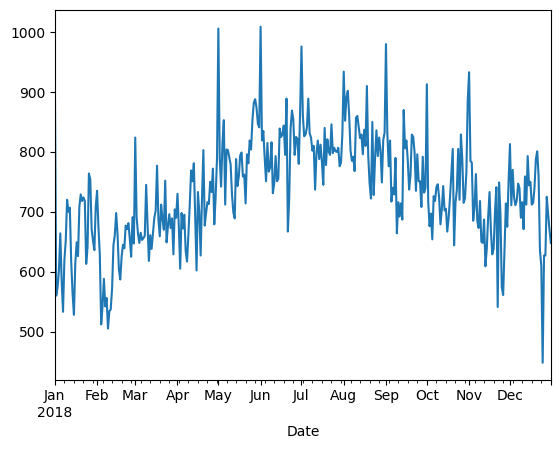

In [15]:
#We will work just with the 2018 data
daily_crimes2018 = daily_crimes['2018']
daily_crimes2018.plot()

Let's bring in the 2018 daily weather (Temperature) data

In [10]:
weather_file_path = 'chicago_2018_weather.csv'

# parsing weather data and making the dates column the index
weather2018 = pd.read_csv(weather_file_path, index_col=5, parse_dates=True) # Set the 6th column (index 5) as the index of the DataFrame.
weather2018.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,TOBS
DATE,,,,,,,,
2018-01-01,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,6,-5.0,-3
2018-01-02,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,8,-7.0,8
2018-01-03,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,18,8.0,9
2018-01-04,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,14,4.0,7
2018-01-05,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,13,3.0,8


In [11]:
#Exploring the weather data.... what's wrong ??
weather2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2018-01-01 to 2018-12-31
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    361 non-null    object 
 1   NAME       361 non-null    object 
 2   LATITUDE   361 non-null    float64
 3   LONGITUDE  361 non-null    float64
 4   ELEVATION  361 non-null    float64
 5   TMAX       361 non-null    int64  
 6   TMIN       360 non-null    float64
 7   TOBS       361 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 25.4+ KB


In [19]:
#Let's add the median temperature, since we don't have the "Average" temperature in the data
medianTemp=((weather2018.TMAX + weather2018.TMIN)/2)
medianTemp.head()
type(medianTemp)

pandas.core.series.Series

In [20]:
#Adding a new column of data to the dataframe. There are several ways to do this.
weather2018['medianT']=medianTemp
weather2018.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,TOBS,medianT
DATE,,,,,,,,,
2018-01-01,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,6,-5.0,-3,0.5
2018-01-02,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,8,-7.0,8,0.5
2018-01-03,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,18,8.0,9,13.0
2018-01-04,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,14,4.0,7,9.0
2018-01-05,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,13,3.0,8,8.0


In [21]:
#Are there missing values?
weather2018.isna().sum()

STATION      0
NAME         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
TMAX         0
TMIN         1
TOBS         0
medianT      1
dtype: int64

We need to handle missing values AND missing items in the time series (361 of 365 days reported)

In [22]:
#Resample data so ALL days of the year are listed. Use ffill to fill the information for missing days.
weather2018=weather2018.resample('D').ffill()

In [23]:
weather2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    365 non-null    object 
 1   NAME       365 non-null    object 
 2   LATITUDE   365 non-null    float64
 3   LONGITUDE  365 non-null    float64
 4   ELEVATION  365 non-null    float64
 5   TMAX       365 non-null    int64  
 6   TMIN       364 non-null    float64
 7   TOBS       365 non-null    int64  
 8   medianT    364 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 28.5+ KB


In [24]:
# Finding the missing values
weather2018[weather2018.TMIN.isnull()]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,TOBS,medianT
DATE,,,,,,,,,
2018-05-30,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,77,NaN,73,NaN


In [25]:
weather2018.TMIN.fillna(method='ffill',inplace=True)

/tmp/ipykernel_516/2597199767.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather2018.TMIN.fillna(method='ffill',inplace=True)


In [26]:
weather2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2018-01-01 to 2018-12-31
Freq: D
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    365 non-null    object 
 1   NAME       365 non-null    object 
 2   LATITUDE   365 non-null    float64
 3   LONGITUDE  365 non-null    float64
 4   ELEVATION  365 non-null    float64
 5   TMAX       365 non-null    int64  
 6   TMIN       365 non-null    float64
 7   TOBS       365 non-null    int64  
 8   medianT    364 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 28.5+ KB


In [27]:
weather2018.loc['2018-05']

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,TOBS,medianT
DATE,,,,,,,,,
2018-05-01,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,83,59.0,73,71.0
2018-05-02,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,86,53.0,64,69.5
2018-05-03,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,67,44.0,66,55.5
2018-05-04,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,73,58.0,66,65.5
2018-05-05,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,81,51.0,51,66.0
2018-05-06,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,60,48.0,51,54.0
2018-05-07,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,64,47.0,64,55.5
2018-05-08,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,76,58.0,60,67.0
2018-05-09,USC00111550,"CHICAGO NORTHERLY ISLAND, IL US",41.8558,-87.6094,177.7,82,56.0,65,69.0


Let's use .loc to get the data record we want (as suggested by the previous warning message)

In [19]:
weather2018.loc['2018-05-30']

STATION                          USC00111550
NAME         CHICAGO NORTHERLY ISLAND, IL US
LATITUDE                             41.8558
LONGITUDE                           -87.6094
ELEVATION                              177.7
TMAX                                      77
TMIN                                     NaN
TOBS                                      73
Name: 2018-05-30 00:00:00, dtype: object

In [ ]:
#Filling the missing values 
#weather2018.medianT.fillna(method='ffill',inplace=True)

In [ ]:
#weather2018.loc['2018-05-30']

In [20]:
medianTemp0530=((weather2018.loc['2018-05-30'].TMAX + weather2018.loc['2018-05-30'].TMIN)/2)
medianTemp0530

nan

In [21]:
weather2018.loc['2018-05-30','medianT'] =medianTemp0530

The value assignment operation in the previous cell did not work and prompted a warning. To understand this and explore further, look at:  https://www.dataquest.io/blog/settingwithcopywarning/

In [22]:
#Value assignment did not work 
weather2018.loc['2018-05-30']

STATION                          USC00111550
NAME         CHICAGO NORTHERLY ISLAND, IL US
LATITUDE                             41.8558
LONGITUDE                           -87.6094
ELEVATION                              177.7
TMAX                                      77
TMIN                                     NaN
TOBS                                      73
medianT                                  NaN
Name: 2018-05-30 00:00:00, dtype: object

In [23]:
#correct assignment
weather2018.loc['2018-05-30','medianT']=medianTemp0530

In [32]:
weather2018.loc['2018-05-30']

STATION                          USC00111550
NAME         CHICAGO NORTHERLY ISLAND, IL US
LATITUDE                             41.8558
LONGITUDE                           -87.6094
ELEVATION                              177.7
TMAX                                      77
TMIN                                    68.0
TOBS                                      73
medianT                                 72.5
Name: 2018-05-30 00:00:00, dtype: object

In [24]:
weather2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2018-01-01 to 2018-12-31
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    361 non-null    object 
 1   NAME       361 non-null    object 
 2   LATITUDE   361 non-null    float64
 3   LONGITUDE  361 non-null    float64
 4   ELEVATION  361 non-null    float64
 5   TMAX       361 non-null    int64  
 6   TMIN       360 non-null    float64
 7   TOBS       361 non-null    int64  
 8   medianT    0 non-null      float64
dtypes: float64(5), int64(2), object(2)
memory usage: 36.3+ KB


## Plots

<Axes: xlabel='DATE'>

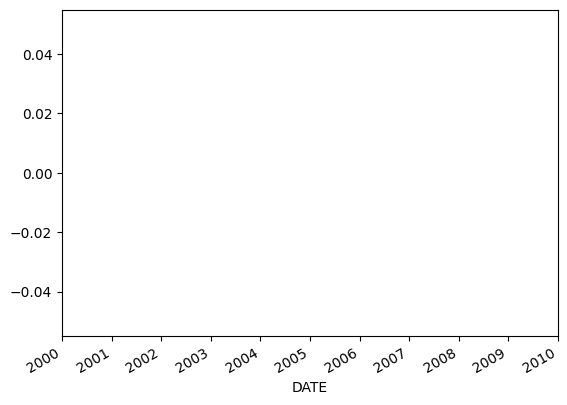

In [29]:
weather2018.medianT.plot()

Let's plot the crime and weather together

In [30]:
daily_temp2018=weather2018.medianT

NameError: name 'daily_crimes2018' is not defined

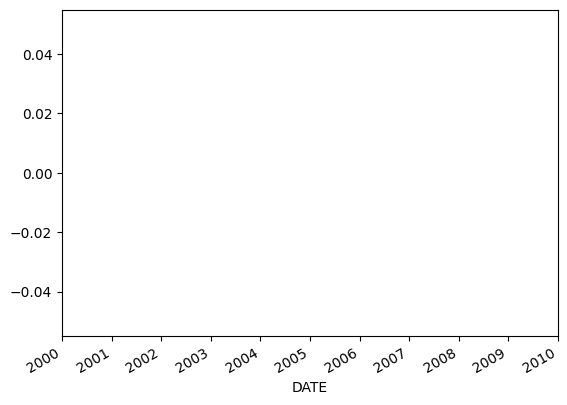

In [28]:
daily_temp2018.plot()
daily_crimes2018.plot()
plt.legend()

Better make separate plots (use subplots)

In [13]:
figsize = (8,3)
plt.figure()
daily_temp2018.plot(title='Temperature', figsize=figsize)
plt.ylabel('Median daily temperature (F)')
plt.figure()
daily_crimes2018.plot(title='Crimes', figsize=figsize)
plt.ylabel('Crimes count per day')
plt.show()

NameError: name 'daily_temp2018' is not defined

<Figure size 640x480 with 0 Axes>

#### If you’d like to smooth out your jagged jagged lines, you’ll want compute a rolling average. So instead of the original values, you’ll have the average of 5 days (or hours, or years, or weeks, or months, or whatever)

Let's smooth the plots by using a "rolling" mean.\
rolling(X).mean() = compute the mean over the last X samples

In [12]:
daily_crimes2018.rolling(10).mean().plot()

NameError: name 'daily_crimes2018' is not defined

Let's build a slider widget to better control the smoothing

In [45]:
from ipywidgets import interact, widgets

@interact(periods=widgets.IntSlider(min=10,max=100,step=10,value=50))
def plot_moving_average(periods=50):
    figsize = (8,3)
    plt.figure()
    daily_temp2018.rolling(periods).mean().plot(title='Temperature', figsize=figsize)
    plt.ylabel('Average daily temperature')
    plt.figure()
    daily_crimes2018.rolling(periods).mean().plot(title='Crimes', figsize=figsize)
    plt.ylabel('Crimes count per day')
    plt.show()

interactive(children=(IntSlider(value=50, description='periods', min=10, step=10), Output()), _dom_classes=('w…

## Computing correlations

In [46]:
combined2018 = pd.DataFrame({'crimes': daily_crimes2018, 'temperature': daily_temp2018})
combined2018.head()

,crimes,temperature
2018-01-01,925,0.5
2018-01-02,560,0.5
2018-01-03,574,13.0
2018-01-04,602,9.0
2018-01-05,664,8.0


Scatter plot

<Axes: xlabel='temperature', ylabel='crimes'>

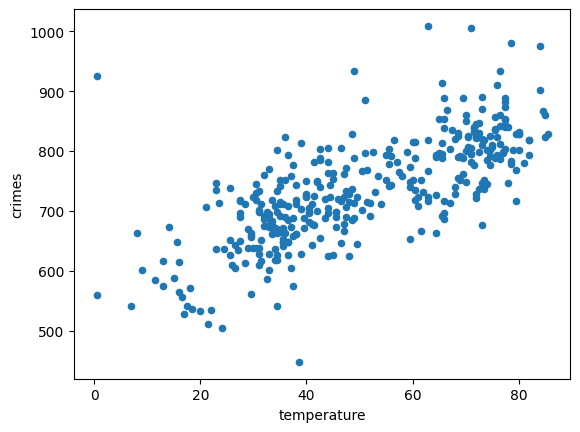

In [47]:
combined2018.plot(kind='scatter', x='temperature', y='crimes')

There is some correlation. Let's compute it

In [48]:
combined2018.corr() # Pearson correlation by default – the standard correlation coefficient

,crimes,temperature
crimes,1.000000,0.731254
temperature,0.731254,1.000000


Let's look at the outliers

In [49]:
combined2018[combined2018.crimes > 950]

,crimes,temperature
2018-05-01,1006,71.0
2018-06-01,1009,63.0
2018-07-01,976,84.0
2018-09-01,980,78.5


## Correlation matrix

In [50]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 946893 entries, 2018-09-01 00:01:00 to 2021-10-01 10:00:00
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    946893 non-null  int64  
 1   Case Number           946893 non-null  object 
 2   Block                 946893 non-null  object 
 3   IUCR                  946893 non-null  object 
 4   Primary Type          946893 non-null  object 
 5   Description           946893 non-null  object 
 6   Location Description  942727 non-null  object 
 7   Arrest                946893 non-null  bool   
 8   Domestic              946893 non-null  bool   
 9   Beat                  946893 non-null  int64  
 10  District              946893 non-null  int64  
 11  Ward                  946854 non-null  float64
 12  Community Area        946892 non-null  float64
 13  FBI Code              946893 non-null  object 
 14  X Coordinate      

In [51]:
#Just process the 2018 data
crimes2018=crimes.loc['2018']

Group crimes by type, count the occurrences per day so that later we can generate a column based organization of the data (i.e. split the counts into different columns where each columm corresponds to crime type)

In [52]:
crimesB = crimes2018.set_index(['Primary Type'], append=True)
crimesB['ocurrences'] = np.ones(len(crimesB), dtype=int)  #adding a new column (of just ones) to facilitate counting 
crimesB.head()

,,ID,Case Number,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,ocurrences
Date,Primary Type,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,THEFT,11646166,JC213529,082XX S INGLESIDE AVE,810,OVER $500,RESIDENCE,False,True,631,6,...,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN,1
2018-01-01 08:00:00,DECEPTIVE PRACTICE,11645648,JC212959,024XX N MONITOR AVE,1153,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2515,25,...,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN,1
2018-12-20 16:00:00,OTHER OFFENSE,11645959,JC211511,045XX N ALBANY AVE,2820,TELEPHONE THREAT,RESIDENCE,False,False,1724,17,...,14.0,08A,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN,1
2018-04-01 00:01:00,DECEPTIVE PRACTICE,11645557,JC212685,080XX S VERNON AVE,1153,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,631,6,...,44.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN,1
2018-12-20 15:00:00,DECEPTIVE PRACTICE,11646293,JC213749,023XX N LOCKWOOD AVE,1154,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25,...,19.0,11,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN,1


In [53]:
crimes_grouped = crimesB.ocurrences.groupby(level=[0,1]).sum()
crimes_grouped

Date                 Primary Type       
2018-01-01 00:00:00  ASSAULT                2
                     BATTERY                5
                     BURGLARY               1
                     CRIM SEXUAL ASSAULT    5
                     CRIMINAL DAMAGE        3
                                           ..
2018-12-31 23:55:00  BATTERY                1
2018-12-31 23:56:00  BATTERY                1
2018-12-31 23:57:00  CRIMINAL DAMAGE        1
2018-12-31 23:59:00  CRIMINAL DAMAGE        1
                     DECEPTIVE PRACTICE     1
Name: ocurrences, Length: 207477, dtype: int64

Splitting the data into a column based display (unstacking)

In [54]:
#crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('D').sum()
crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('D').sum().astype(int)
crimes_by_type.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0,38,161,32,0,13,66,9,10,114,...,0,64,0,0,2,30,36,1,132,20
2018-01-02,0,28,89,20,0,2,46,0,17,61,...,0,49,0,0,3,28,0,1,128,9
2018-01-03,1,39,81,19,0,3,38,0,17,55,...,0,39,3,0,3,37,0,0,159,12
2018-01-04,2,42,102,31,0,0,47,0,23,48,...,0,43,0,0,2,32,0,1,134,15
2018-01-05,0,53,107,24,0,3,63,1,16,60,...,0,44,0,0,1,34,2,0,164,9


In [56]:
crimes_detail2018 = crimes_by_type
crimes_detail2018['temperature'] = daily_temp2018
crimes_detail2018.tail()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,temperature
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-27,0,43,92,35,0,1,67,0,14,45,...,36,5,0,3,27,2,0,171,19,45.0
2018-12-28,0,46,119,33,0,3,64,1,16,55,...,37,3,0,6,38,2,2,187,20,41.5
2018-12-29,2,50,142,35,1,3,85,0,19,40,...,41,0,0,3,30,1,0,145,21,27.5
2018-12-30,0,47,139,34,0,4,86,1,15,38,...,37,0,0,3,38,1,0,142,16,29.0
2018-12-31,1,42,106,29,1,2,94,2,14,46,...,29,0,0,3,40,0,0,160,21,36.5


In [57]:
corr = crimes_detail2018.corr()
corr.style.background_gradient()   #the higher the correlation value, the darker the color

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION,temperature
Primary Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARSON,1.000000,0.144121,0.135276,0.107774,-0.005162,0.016504,0.120657,0.019248,-0.022100,-0.085793,0.018523,0.055936,-0.047546,-0.047864,0.157136,-0.079896,0.003128,0.056662,-0.018905,-0.014710,0.026886,-0.086442,-0.080139,-0.050798,-0.087116,0.076086,-0.031209,-0.038120,0.029277,-0.005015,-0.106759,0.152859,0.162573,0.135807
ASSAULT,0.144121,1.000000,0.394890,0.292598,0.015396,0.239249,0.320400,-0.000330,0.111784,0.229435,0.279344,0.102741,-0.026367,0.091649,0.123945,0.087545,0.035102,-0.049627,0.111644,0.080859,0.038957,0.076381,0.006486,-0.034892,0.365078,0.087383,0.048757,0.186839,0.039211,0.139402,0.053709,0.435998,0.245450,0.602843
BATTERY,0.135276,0.394890,1.000000,0.074012,0.177833,0.326819,0.559841,0.173871,-0.008986,-0.144116,0.241999,0.160942,-0.065559,0.200162,0.070737,0.016622,0.146709,0.114331,0.042140,-0.062668,0.006085,0.014297,0.075159,-0.046117,0.057139,0.013868,0.066344,0.062253,0.246631,0.160751,0.046105,0.280994,0.460123,0.583445
BURGLARY,0.107774,0.292598,0.074012,1.000000,0.011177,0.042832,0.210380,0.057233,0.168941,0.255578,0.166353,0.058765,-0.049055,0.016631,0.044093,-0.008665,0.054428,0.185068,0.211323,0.117373,0.148254,0.115385,0.071520,0.065387,0.203731,0.106644,0.017225,0.113914,0.151413,0.138909,-0.010237,0.487985,0.160245,0.424042
CONCEALED CARRY LICENSE VIOLATION,-0.005162,0.015396,0.177833,0.011177,1.000000,0.020120,0.201039,0.081797,0.008985,-0.046462,0.074135,0.056035,0.050674,0.164242,-0.063090,0.059438,0.080912,0.003524,0.167237,-0.050291,0.036926,0.054871,-0.015827,-0.033582,-0.011971,-0.011725,0.073547,0.047482,0.074149,0.060125,0.037600,0.101767,0.150764,0.161444
CRIM SEXUAL ASSAULT,0.016504,0.239249,0.326819,0.042832,0.020120,1.000000,0.190896,0.214881,-0.043282,0.242428,0.064809,0.154308,-0.004375,0.053307,-0.071638,-0.042835,0.109863,0.092411,0.036417,-0.030608,-0.052916,0.145774,0.300807,-0.022674,0.226659,-0.000170,-0.010041,0.129814,0.096731,0.324288,0.066162,0.126326,0.203592,0.203879
CRIMINAL DAMAGE,0.120657,0.320400,0.559841,0.210380,0.201039,0.190896,1.000000,0.111211,0.010510,-0.075851,0.264445,0.142673,-0.088283,0.214918,0.071577,-0.007214,0.159469,-0.014077,0.102644,-0.050069,0.078344,0.073953,0.015412,0.002593,0.149733,0.140775,0.044593,0.055395,0.258115,0.096665,0.062539,0.379454,0.417087,0.567045
CRIMINAL SEXUAL ASSAULT,0.019248,-0.000330,0.173871,0.057233,0.081797,0.214881,0.111211,1.000000,-0.028466,0.191707,0.022027,0.041702,-0.022500,-0.007526,0.003151,-0.012278,0.069987,0.181948,-0.027548,0.007344,-0.027011,0.019040,0.485826,-0.033863,0.134776,0.029104,-0.009421,-0.001639,0.093211,0.364943,0.071078,0.104982,0.152373,0.010836
CRIMINAL TRESPASS,-0.022100,0.111784,-0.008986,0.168941,0.008985,-0.043282,0.010510,-0.028466,1.000000,0.107019,0.115127,-0.024507,0.026966,0.012301,-0.011377,0.069624,-0.049622,-0.061195,0.184979,-0.071538,-0.045520,0.005584,-0.063832,-0.010723,0.063908,0.038481,0.012878,0.097274,0.002167,-0.033375,0.053814,0.133692,0.036325,0.141437


Let's focus on the correlation with temperature

In [58]:
corr = crimes_detail2018.corr().loc[:,['temperature']].sort_values(ascending=False, by='temperature')
corr.style.background_gradient()

Primary Type,temperature
Primary Type,
temperature,1.000000
THEFT,0.631531
ASSAULT,0.602843
BATTERY,0.583445
CRIMINAL DAMAGE,0.567045
GAMBLING,0.427726
BURGLARY,0.424042
WEAPONS VIOLATION,0.419322
INTERFERENCE WITH PUBLIC OFFICER,0.234233


Let's check on the amount of data for each crime type

In [59]:
crimes_by_type.sum().sort_values(ascending=False)

Primary Type
THEFT                                65268.0
BATTERY                              49813.0
CRIMINAL DAMAGE                      27823.0
ASSAULT                              20403.0
DECEPTIVE PRACTICE                   19590.0
temperature                          18390.5
OTHER OFFENSE                        17253.0
NARCOTICS                            13577.0
BURGLARY                             11745.0
MOTOR VEHICLE THEFT                   9982.0
ROBBERY                               9679.0
CRIMINAL TRESPASS                     6907.0
WEAPONS VIOLATION                     5456.0
OFFENSE INVOLVING CHILDREN            2311.0
CRIM SEXUAL ASSAULT                   1449.0
PUBLIC PEACE VIOLATION                1372.0
INTERFERENCE WITH PUBLIC OFFICER      1306.0
SEX OFFENSE                           1155.0
PROSTITUTION                           718.0
HOMICIDE                               600.0
ARSON                                  373.0
LIQUOR LAW VIOLATION                   268